# **Task Overview**
> **Objective:** Build a machine learning model to predict customer churn using historical data.

### **Deliverables:**

• Exploratory Data Analysis (EDA)

• Feature engineering

• Train/test split and model selection (Logistic Regression, XGBoost, etc.)

• Performance metrics (confusion matrix, AUC-ROC)

• Final report with visualizations


### **Mock Data (Python):**

In [1]:
import pandas as pd

import numpy as np



np.random.seed(42)

n = 10000

data = pd.DataFrame({

  'CustomerID': np.arange(n),

  'Gender': np.random.choice(['Male', 'Female'], size=n),

  'SeniorCitizen': np.random.choice([0, 1], size=n),

  'Tenure': np.random.randint(1, 72, size=n),

  'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n), 2),

  'TotalCharges': lambda df: df['Tenure'] * df['MonthlyCharges'],

  'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),

  'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n),

  'Churn': np.random.choice([0, 1], size=n, p=[0.73, 0.27])

})

data['TotalCharges'] = (data['Tenure'] * data['MonthlyCharges']).round(2)

In [10]:
data.head()

,CustomerID,Gender,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,0,Male,0,55,111.88,6153.40,Two year,Mailed check,0
1,1,Female,1,36,58.70,2113.20,Two year,Electronic check,0
2,2,Male,0,37,118.86,4397.82,One year,Electronic check,0
3,3,Male,1,14,96.14,1345.96,Month-to-month,Mailed check,1
4,4,Male,1,27,28.05,757.35,Two year,Mailed check,0


In [6]:
# Display basic information about the dataset
print("Dataset shape:", data.shape)

print("Data types:\n", data.dtypes.value_counts())


Dataset shape: (10000, 9)
Data types:
 int64      4
object     3
float64    2
Name: count, dtype: int64


In [7]:
# Display descriptive statistics
print("\nDescriptive statistics:")
display(data.describe(include="all").T)


Descriptive statistics:


,CustomerID,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.499300,35.955000,70.451038,2541.807390,0.267000
std,2886.89568,0.500025,20.501761,28.935692,1879.645307,0.442414
min,0.00000,0.000000,1.000000,20.000000,21.200000,0.000000
25%,2499.75000,0.000000,18.000000,45.527500,1035.057500,0.000000
50%,4999.50000,0.000000,36.000000,70.585000,2117.135000,0.000000
75%,7499.25000,1.000000,54.000000,95.612500,3717.352500,1.000000
max,9999.00000,1.000000,71.000000,120.000000,8384.390000,1.000000


In [13]:
data.isna().mean().sort_values(ascending=False)  # top 15 missing-value columns

CustomerID        0.0
Gender            0.0
SeniorCitizen     0.0
Tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
Contract          0.0
PaymentMethod     0.0
Churn             0.0
dtype: float64

In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
CustomerID        0
Gender            0
SeniorCitizen     0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
PaymentMethod     0
Churn             0
dtype: int64


In [9]:
# Explore the target variable distribution
print("\nChurn distribution:")
churn_counts = data['Churn'].value_counts(normalize=True) * 100
print(churn_counts.to_frame().rename(columns={'Churn': 'Percentage (%)'}))


Churn distribution:
       proportion
Churn            
0            73.3
1            26.7


In [14]:
data.duplicated().sum()

np.int64(0)

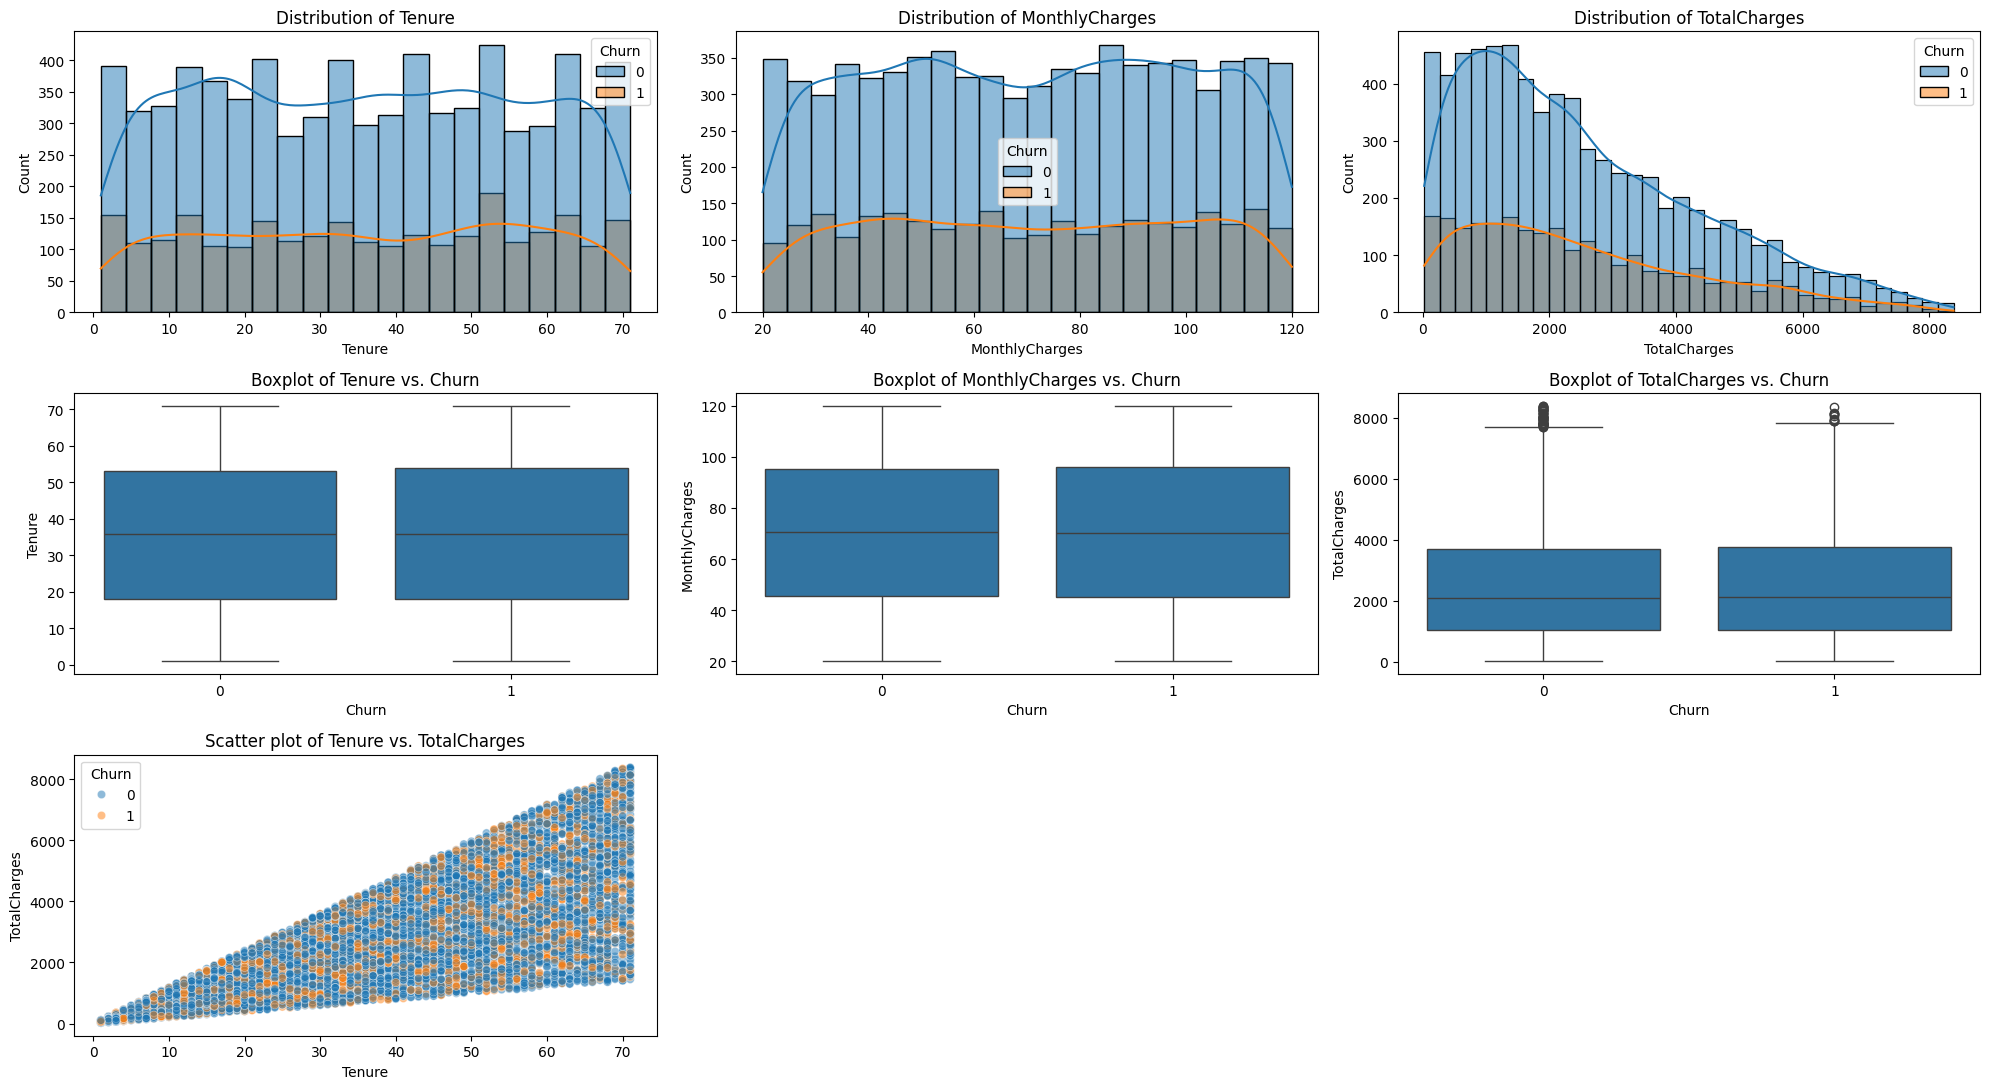

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Visualize the distribution of numerical features
numerical_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 11))

# Histograms
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=data, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribution of {feature}')

# Box plots
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 4)
    sns.boxplot(data=data, y=feature, x='Churn')
    plt.title(f'Boxplot of {feature} vs. Churn')

# Scatter plot (Tenure vs. TotalCharges)
plt.subplot(3, 3, 7)
sns.scatterplot(data=data, x='Tenure', y='TotalCharges', hue='Churn', alpha=0.5)
plt.title('Scatter plot of Tenure vs. TotalCharges')

plt.tight_layout()
plt.show()

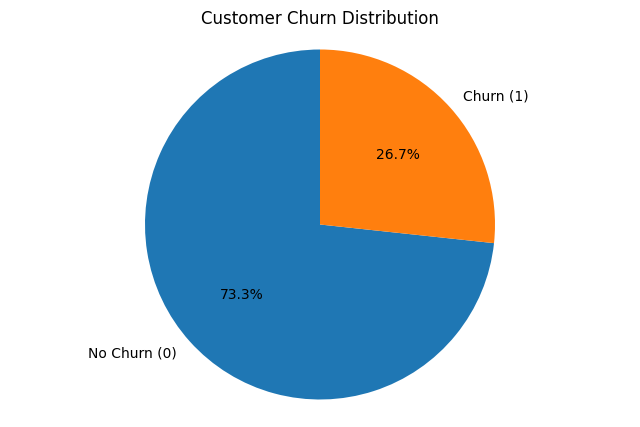

In [ ]:
# Visualize the churn distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.pie(churn_counts, labels=['No Churn (0)', 'Churn (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.show()